In [ ]:
from google.colab import files
uploaded = files.upload()

import zipfile
import os

Saving 6.+Turbofan+Engine+Degradation+Simulation+Data+Set.zip to 6.+Turbofan+Engine+Degradation+Simulation+Data+Set (1).zip


In [ ]:
import zipfile
import os

zip_path = "6.+Turbofan+Engine+Degradation+Simulation+Data+Set.zip"
extract_path = "./cmaps_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

#Barresie fileha
# for root, dirs, files in os.walk(extract_path):
#     for file in files:
#         print(os.path.join(root, file))


zip2_path = "./cmaps_data/6. Turbofan Engine Degradation Simulation Data Set/CMAPSSData.zip"
extract_path2 = "./cmaps_data/CMAPSSData"

with zipfile.ZipFile(zip2_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path2)

# Filehaye estekhraj shode
for root, dirs, files in os.walk(extract_path2):
    for file in files:
        print(os.path.join(root, file))

./cmaps_data/CMAPSSData/train_FD001.txt
./cmaps_data/CMAPSSData/test_FD003.txt
./cmaps_data/CMAPSSData/test_FD002.txt
./cmaps_data/CMAPSSData/RUL_FD003.txt
./cmaps_data/CMAPSSData/Damage Propagation Modeling.pdf
./cmaps_data/CMAPSSData/RUL_FD002.txt
./cmaps_data/CMAPSSData/RUL_FD001.txt
./cmaps_data/CMAPSSData/RUL_FD004.txt
./cmaps_data/CMAPSSData/readme.txt
./cmaps_data/CMAPSSData/test_FD001.txt
./cmaps_data/CMAPSSData/train_FD003.txt
./cmaps_data/CMAPSSData/test_FD004.txt
./cmaps_data/CMAPSSData/train_FD004.txt
./cmaps_data/CMAPSSData/train_FD002.txt


In [ ]:
import pandas as pd

# Tarife name sutunha
columns = ['unit', 'cycle'] + [f'op_setting_{i}' for i in range(1, 4)] + \
               [f'sensor_measurement_{i}' for i in range(1, 22)]

# Masire file FD001
data_path = "./cmaps_data/CMAPSSData/train_FD001.txt"

df = pd.read_csv(data_path, sep='\s+', header=None, names=columns)

# Chand satre aval
df.head()

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Hazfe sutunhaye unit va cycle
sensor_data = df.drop(columns=['unit', 'cycle'])

# Filter variance
Var_selector = VarianceThreshold(threshold=0.01)
Var_selector.fit(sensor_data)

# Entekhabe sutunhaye daraye variance kam
low_var = sensor_data.columns[~Var_selector.get_support()]
print("Vizhegihaye daraye variance kam:\n", list(low_var))

# Hazf
sensor_data2 = df.drop(columns=low_var)
baghimande = sensor_data2.columns.tolist()
print("Vizhegihaye baghimande:\n", baghimande)

Vizhegihaye daraye variance kam:
 ['op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_measurement_1', 'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_8', 'sensor_measurement_10', 'sensor_measurement_13', 'sensor_measurement_15', 'sensor_measurement_16', 'sensor_measurement_18', 'sensor_measurement_19']
Vizhegihaye baghimande:
 ['unit', 'cycle', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_7', 'sensor_measurement_9', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_14', 'sensor_measurement_17', 'sensor_measurement_20', 'sensor_measurement_21']


In [ ]:
import numpy as np

sensor_data_only = sensor_data2.drop(columns=['unit', 'cycle'])

# Matrix hambastegi
corr_matrix = sensor_data_only.corr().abs()
np.fill_diagonal(corr_matrix.values, 0)

to_drop = set()
vizhegi_moshabeh = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        if corr_matrix.iloc[i, j] > 0.95:
            vizhegi_moshabeh.append((col1, col2))
            if col2 not in to_drop:
                to_drop.add(col2)

# Report
print("Joft vizhegihaye moshabeh (hambastegi > 0.95):")
for pair in vizhegi_moshabeh:
    print(pair)

print("\nVizhegihaye hazf shode (yek az har joft):\n", list(to_drop))

# Hazf
sensor_data2 = sensor_data2.drop(columns=to_drop)

final_sensor_columns = sensor_data2.drop(columns=['unit', 'cycle']).columns.tolist()
print("\nTedad vizhegihaye baghimande:", len(final_sensor_columns))
print("Vizhegihaye nahayi:\n", final_sensor_columns)

Joft vizhegihaye moshabeh (hambastegi > 0.95):
('sensor_measurement_9', 'sensor_measurement_14')

Vizhegihaye hazf shode (yek az har joft):
 ['sensor_measurement_14']

Tedad vizhegihaye baghimande: 10
Vizhegihaye nahayi:
 ['sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_7', 'sensor_measurement_9', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_17', 'sensor_measurement_20', 'sensor_measurement_21']


In [ ]:
# RUL
rul = sensor_data2.groupby('unit')['cycle'].max().reset_index()
rul.columns = ['unit', 'max_cycle']
df_with_rul = sensor_data2.merge(rul, on='unit', how='left')
df_with_rul['RUL'] = df_with_rul['max_cycle'] - df_with_rul['cycle']
df_with_rul.drop(columns=['max_cycle'], inplace=True)

# Chand satr
df_with_rul[['unit', 'cycle', 'RUL']].head()

# Entekhabe vizhegihaye sensor baraye hambastegi(az bakhshe ghabl)
Vizhegiha = ['sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4',
            'sensor_measurement_7','sensor_measurement_9', 'sensor_measurement_11', 'sensor_measurement_12',
            'sensor_measurement_17', 'sensor_measurement_20', 'sensor_measurement_21']

# Mohasebeye hambastegie har vizhegi ba RUL
correlations = df_with_rul[Vizhegiha + ['RUL']].corr()['RUL'].drop('RUL')
print("Hambastegie vizhegiha ba RUL:\n", correlations)

threshold = 0.1 # Astane hambastegi
Hambastegi_low = correlations[correlations.abs() < threshold].index.tolist()
print("\nVizhegihaye ba hambastegie kamtar az (abs) 0.1:\n", Hambastegi_low)

# Hazfe vizhegihaye kam ertebat
final_features_after_rf = [f for f in Vizhegiha if f not in Hambastegi_low]
print("Vizhegihaye nahayi pas az hazfe vizhegihaye kam ertebat: \n", final_features_after_rf)

Hambastegie vizhegiha ba RUL:
 sensor_measurement_2    -0.606484
sensor_measurement_3    -0.584520
sensor_measurement_4    -0.678948
sensor_measurement_7     0.657223
sensor_measurement_9    -0.390102
sensor_measurement_11   -0.696228
sensor_measurement_12    0.671983
sensor_measurement_17   -0.606154
sensor_measurement_20    0.629428
sensor_measurement_21    0.635662
Name: RUL, dtype: float64

Vizhegihaye ba hambastegie kamtar az (abs) 0.1:
 []
Vizhegihaye nahayi pas az hazfe vizhegihaye kam ertebat: 
 ['sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_7', 'sensor_measurement_9', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_17', 'sensor_measurement_20', 'sensor_measurement_21']


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# import matplotlib.pyplot as plt
# import pandas as pd

# features = ['sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_7', 'sensor_measurement_9',
#             'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_17', 'sensor_measurement_20', 'sensor_measurement_21']
# X = df_with_rul[features]
# y = df_with_rul['RUL']

# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X, y)

# importances = rf.feature_importances_

# feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
# feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# print("Ahamiate vizhegiha bar asase Random Forest:\n", feature_importance_df)

# plt.figure(figsize=(10,6))
# plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
# plt.xlabel('Importance')
# plt.title('Feature Importance based on Random Forest')
# plt.gca().invert_yaxis()
# plt.show()

# threshold = 0.05
# low_importance_features = feature_importance_df[feature_importance_df['importance'] < threshold]['feature'].tolist()
# print("Vizhegihaye ba ahamiat kamtar az 0.05: {}".format(threshold, low_importance_features))

# final_features_after_rf = [f for f in features if f not in low_importance_features]
# print("Vizhegihaye nahayi pas az hazfe vizhegiha bar asase ahamiate model:\n", final_features_after_rf)


In [ ]:
from sklearn.model_selection import train_test_split

df_final = df_with_rul[['unit', 'cycle'] + final_features_after_rf + ['RUL']].copy()

# Taghsime asli
train_df, test_df = train_test_split(df_final, test_size=0.3, random_state=42, shuffle=False)

# Taghsime dade amuzesh be train va validation
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, shuffle=False)

print("Tedad nemuneha dar kole DataFrame:", len(df_final))
print("Tedad nemuneha dar dadeye amuzesh:", len(train_df))
print("Tedad nemuneha dar dadeye test:", len(test_df))
print("Tedad nemuneha dar dadeye test:", len(val_df))
print("Units dar amuzesh:", train_df['unit'].nunique())
print("Units dar test:", test_df['unit'].nunique())

Tedad nemuneha dar kole DataFrame: 20631
Tedad nemuneha dar dadeye amuzesh: 11552
Tedad nemuneha dar dadeye test: 6190
Tedad nemuneha dar dadeye test: 2889
Units dar amuzesh: 59
Units dar test: 29


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalsazi faghat bar asase train
scaler = MinMaxScaler()
scaler.fit(train_df[final_features_after_rf])

train_df[final_features_after_rf] = train_df[final_features_after_rf].astype(float)
val_df[final_features_after_rf] = val_df[final_features_after_rf].astype(float)
test_df[final_features_after_rf] = test_df[final_features_after_rf].astype(float)

# Normalsazi ruye tamame dadeha
train_df.loc[:, final_features_after_rf] = scaler.transform(train_df[final_features_after_rf])
val_df.loc[:, final_features_after_rf] = scaler.transform(val_df[final_features_after_rf])
test_df.loc[:, final_features_after_rf] = scaler.transform(test_df[final_features_after_rf])

print("\nMiangin va enheraf meyar chand vizhegie aval az dade train bad az normalsazi:")
print(train_df[final_features_after_rf].describe().T[['mean', 'std']].head())


Miangin va enheraf meyar chand vizhegie aval az dade train bad az normalsazi:
                          mean       std
sensor_measurement_2  0.433661  0.154237
sensor_measurement_3  0.441354  0.140455
sensor_measurement_4  0.403815  0.164607
sensor_measurement_7  0.571761  0.143542
sensor_measurement_9  0.203473  0.109024


In [ ]:
import numpy as np

def sliding_windows(df, feature_cols, window_size=30, max_rul=130):
    X_windows = []
    y_labels = []

    for unit_number, unit_df in df.groupby('unit'):
        unit_df = unit_df.sort_values('cycle').reset_index(drop=True)
        if len(unit_df) < window_size:
            continue
        for i in range(len(unit_df) - window_size + 1):
            window = unit_df.iloc[i:i+window_size]
            X_window = window[feature_cols].values
            rul_value = window.iloc[-1]['RUL']
            rul_capped = min(rul_value, max_rul)
            X_windows.append(X_window)
            y_labels.append(rul_capped)

    return np.array(X_windows), np.array(y_labels)

# Tolide dadehaye panjereyi baraye har bakhsh
window_size = 30
max_rul = 130

X_train_windows, y_train_windows = sliding_windows(train_df, final_features_after_rf, window_size, max_rul)
X_val_windows, y_val_windows = sliding_windows(val_df, final_features_after_rf, window_size, max_rul)
X_test_windows, y_test_windows = sliding_windows(test_df, final_features_after_rf, window_size, max_rul)

print(f"X_train_windows shape: {X_train_windows.shape}")
print(f"y_train_windows shape: {y_train_windows.shape}")
print(f"X_test_windows shape: {X_test_windows.shape}")
print(f"y_test_windows shape: {y_test_windows.shape}")

# Mesal baraye tahlil
print("\nX_train_windows:")
print(X_train_windows[0])  # Matrix panjere aval

print("\nBrachasb:")
print(y_train_windows[0])

X_train_windows shape: (9857, 30, 10)
y_train_windows shape: (9857,)
X_test_windows shape: (5349, 30, 10)
y_test_windows shape: (5349,)

X_train_windows:
[[0.17378049 0.42515379 0.25735561 0.72624799 0.109755   0.36526946
  0.62197802 0.36363636 0.70866142 0.72548186]
 [0.27439024 0.47345637 0.3034871  0.62801932 0.1002423  0.37724551
  0.75824176 0.36363636 0.66141732 0.73200113]
 [0.33536585 0.38619275 0.32273883 0.71014493 0.14004308 0.24550898
  0.78901099 0.18181818 0.62204724 0.61947279]
 [0.33536585 0.26771474 0.28042136 0.74074074 0.12451763 0.16167665
  0.88571429 0.36363636 0.56692913 0.66156463]
 [0.34146341 0.2690818  0.35942608 0.66827697 0.14995962 0.25149701
  0.73846154 0.45454545 0.58267717 0.70479025]
 [0.25914634 0.30599225 0.21685434 0.77616747 0.12541506 0.17964072
  0.62637363 0.27272727 0.64566929 0.65164399]
 [0.375      0.48484848 0.20595714 0.72302738 0.16781836 0.2994012
  0.76703297 0.36363636 0.74015748 0.66652494]
 [0.39939024 0.27158806 0.26407555 0.64412

In [ ]:
# print("\nTedad [anjereha be ezaye har unit(Train Data):")
# for unit_id in train_df['unit'].unique():
#     unit_len = len(train_df[train_df['unit'] == unit_id])
#     if unit_len >= window_size:
#         print(f"unit {unit_id}: {unit_len - window_size + 1} panjere")
print("Unit moshtarak beine amuzesh va test?",
      bool(set(train_df['unit'].unique()) & set(test_df['unit'].unique())))


Unit moshtarak beine amuzesh va test? False


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 30, 64)         │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 15, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,009 (136.75 KB)

 Trainable params: 35,009 (136.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
309/309 - 7s - 22ms/step - loss: 1752.1079 - mae: 31.4640 - val_loss: 794.2220 - val_mae: 23.5446
Epoch 2/50
309/309 - 1s - 3ms/step - loss: 641.6176 - mae: 19.8216 - val_loss: 760.4941 - val_mae: 22.6051
Epoch 3/50
309/309 - 1s - 4ms/step - loss: 599.5368 - mae: 19.1586 - val_loss: 790.1995 - val_mae: 23.2282
Epoch 4/50
309/309 - 2s - 5ms/step - loss: 586.6824 - mae: 18.8487 - val_loss: 829.6028 - val_mae: 23.7645
Epoch 5/50
309/309 - 2s - 6ms/step - loss: 558.2981 - mae: 18.2266 - val_loss: 835.1032 - val_mae: 23.8402
Epoch 6/50
309/309 - 1s - 3ms/step - loss: 538.6989 - mae: 17.8828 - val_loss: 813.6921 - val_mae: 23.5966
Epoch 7/50
309/309 - 1s - 5ms/step - loss: 513.1932 - mae: 17.4828 - val_loss: 725.7574 - val_mae: 22.2257
Epoch 8/50
309/309 - 2s - 7ms/step - loss: 498.1468 - mae: 17.1495 - val_loss: 704.6996 - val_mae: 21.9516
Epoch 9/50
309/309 - 1s - 4ms/step - loss: 490.1612 - mae: 16.9948 - val_loss: 745.0223 - val_mae: 22.7875
Epoch 10/50
309/309 - 1s - 4ms/step

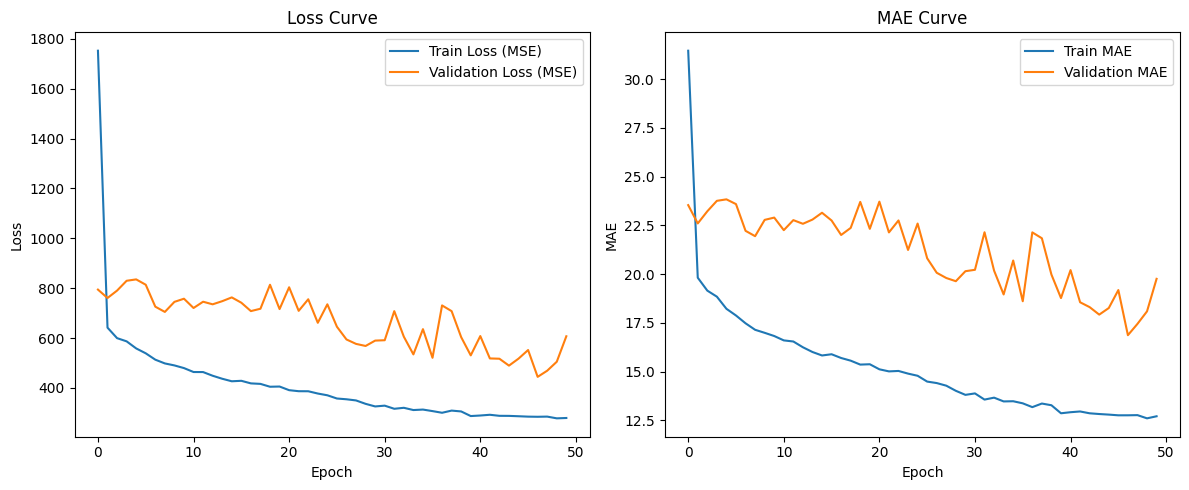

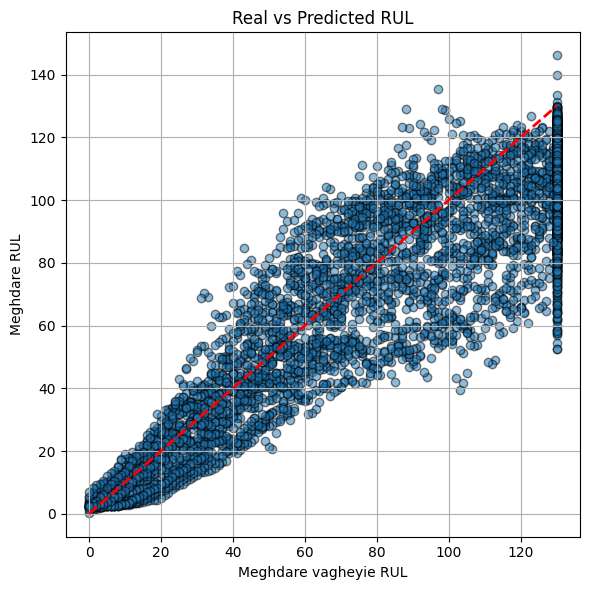

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import random
import time
from sklearn.metrics import r2_score

# reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# CNN
input_shape = X_train_windows.shape[1:]
model = Sequential([
    Conv1D(64, 3, padding='same', activation='relu', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    Conv1D(128, 3, padding='same', activation='relu'),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[tf.keras.metrics.MeanAbsoluteError(name='mae')]
)

model.summary()

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Zamane shurue amuzesh
start_time = time.time()

# Amuzeshe model
history = model.fit(
    X_train_windows, y_train_windows,
    validation_data=(X_val_windows, y_val_windows),
    batch_size=32,
    epochs=50,
    callbacks=[],
    verbose=2
)

# Zamane payane amuzesh
end_time = time.time()
training_time = end_time - start_time
print(f"\nZamane amuzeshe model {training_time:.2f} sec")

# Arzyabi ruye dade test
eval_results = model.evaluate(X_test_windows, y_test_windows, verbose=0)
print(f"MSE: {eval_results[0]:.4f}")
print(f"MAE: {eval_results[1]:.4f}")

# RMSE & log RMSE
y_pred = model.predict(X_test_windows).flatten()
rmse = np.sqrt(mean_squared_error(y_test_windows, y_pred))
# Jelogiri az maghadire manfi
y_pred_safe = np.maximum(y_pred, 0)
y_test_safe = np.maximum(y_test_windows, 0)

log_rmse = np.sqrt(np.mean(np.square(np.log1p(y_test_safe) - np.log1p(y_pred_safe))))

r2 = r2_score(y_test_windows, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"log RMSE: {log_rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Nemudarha
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss Curve'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch'); plt.ylabel('MAE'); plt.title('MAE Curve'); plt.legend()

plt.tight_layout()
plt.show()

# Nemudare vagheyi dar barabare pishbini shode
plt.figure(figsize=(6,6))
plt.scatter(y_test_windows, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test_windows.min(), y_test_windows.max()],
         [y_test_windows.min(), y_test_windows.max()],
         'r--', lw=2)
plt.xlabel("Meghdare vagheyie RUL")
plt.ylabel("Meghdare RUL")
plt.title("Real vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 100)        │        44,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,929 (304.41 KB)

 Trainable params: 77,929 (304.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
309/309 - 7s - 24ms/step - loss: 3366.1685 - mae: 48.3240 - val_loss: 1928.8341 - val_mae: 39.4596
Epoch 2/50
309/309 - 3s - 9ms/step - loss: 1940.5917 - mae: 38.7286 - val_loss: 1921.3629 - val_mae: 39.3537
Epoch 3/50
309/309 - 3s - 9ms/step - loss: 1931.9180 - mae: 38.6648 - val_loss: 1925.8969 - val_mae: 39.4190
Epoch 4/50
309/309 - 5s - 16ms/step - loss: 1920.5151 - mae: 38.5464 - val_loss: 1919.6014 - val_mae: 39.3284
Epoch 5/50
309/309 - 5s - 16ms/step - loss: 1700.4163 - mae: 35.6480 - val_loss: 887.2142 - val_mae: 25.3586
Epoch 6/50
309/309 - 3s - 10ms/step - loss: 483.2847 - mae: 16.9785 - val_loss: 343.0648 - val_mae: 14.4400
Epoch 7/50
309/309 - 3s - 8ms/step - loss: 381.2501 - mae: 14.8644 - val_loss: 299.9770 - val_mae: 13.9605
Epoch 8/50
309/309 - 2s - 8ms/step - loss: 339.5921 - mae: 13.8561 - val_loss: 334.8543 - val_mae: 14.3854
Epoch 9/50
309/309 - 2s - 8ms/step - loss: 323.6913 - mae: 13.5317 - val_loss: 298.5952 - val_mae: 13.7435
Epoch 10/50
309/309 - 3s

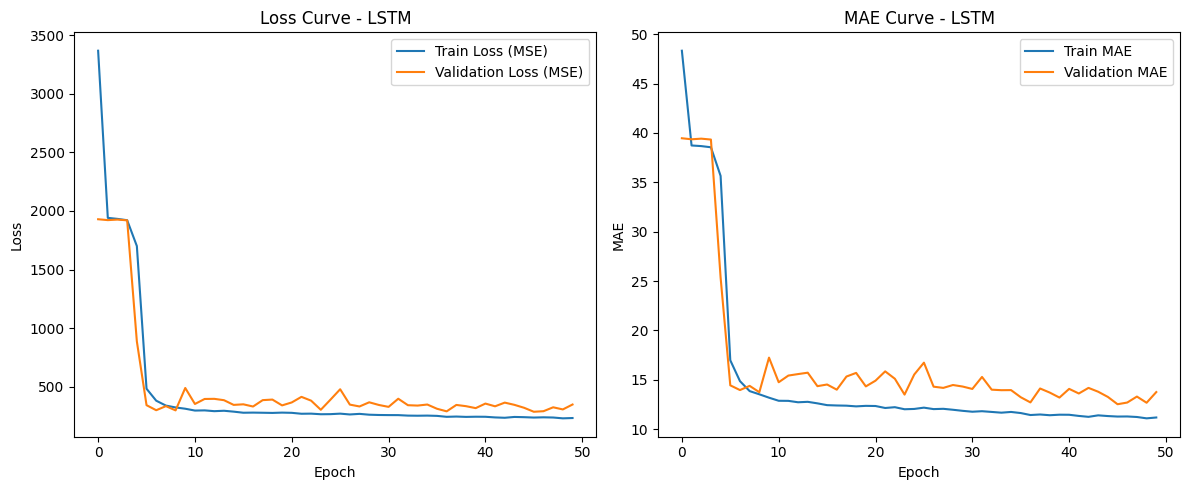

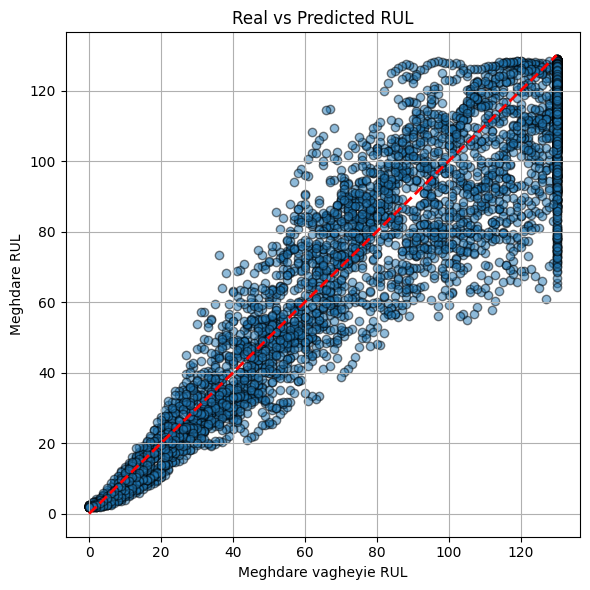

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error
import random
import tensorflow as tf
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import time

# reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# LSTM
input_shape = X_train_windows.shape[1:]

model_lstm = Sequential([
    LSTM(100, return_sequences=True, input_shape=input_shape),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_lstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[tf.keras.metrics.MeanAbsoluteError(name='mae')]
)

model_lstm.summary()

# # callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

start_time = time.time()

# Amuzeshe model
history_lstm = model_lstm.fit(
    X_train_windows, y_train_windows,
    validation_data=(X_val_windows, y_val_windows),
    batch_size=32,
    epochs=50,
    callbacks=[],
    verbose=2
)


end_time = time.time()
print(f"\nTraining time: {(end_time - start_time)/60:.2f} minutes")

# Arzyabi ruye dade test
eval_results = model_lstm.evaluate(X_test_windows, y_test_windows, verbose=0)
print(f"MSE: {eval_results[0]:.4f}")
print(f"MAE: {eval_results[1]:.4f}")

y_pred_lstm = model_lstm.predict(X_test_windows)
rmse = np.sqrt(mean_squared_error(y_test_windows, y_pred_lstm))
y_pred_safe1 = np.maximum(y_pred_lstm, 0)
y_test_safe1 = np.maximum(y_test_windows, 0)
log_rmse = np.sqrt(np.mean(np.square(np.log1p(y_test_safe1) - np.log1p(y_pred_safe1))))



#log_rmse = np.log(rmse + 1e-10)
r2 = r2_score(y_test_windows, y_pred_lstm)

print(f"RMSE: {rmse:.4f}")
print(f"log RMSE: {log_rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Nemudarha
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_lstm.history['loss'], label='Train Loss (MSE)')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss Curve - LSTM'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_lstm.history['mae'], label='Train MAE')
plt.plot(history_lstm.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch'); plt.ylabel('MAE'); plt.title('MAE Curve - LSTM'); plt.legend()

plt.tight_layout()
plt.show()

# Nemudare vagheyi va pishbini shode
plt.figure(figsize=(6,6))
plt.scatter(y_test_windows, y_pred_lstm, alpha=0.5, edgecolors='k')
plt.plot([y_test_windows.min(), y_test_windows.max()],
         [y_test_windows.min(), y_test_windows.max()],
         'r--', lw=2)
plt.xlabel("Meghdare vagheyie RUL")
plt.ylabel("Meghdare RUL")
plt.title("Real vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.figure(figsize=(10,6))
# plt.plot(y_test_windows, label='Actual RUL', marker='o')
# plt.plot(y_pred_lstm, label='Predicted RUL', marker='x')
# plt.title('Nemudare vagheyi va pishbini shode RUL ruye dade Test')
# plt.xlabel('Sample Index')
# plt.ylabel('RUL')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import time

def sliding_windows(df, feature_cols, window_size=30, max_rul=130):
    X_windows, y_labels = [], []
    for unit_number, unit_df in df.groupby('unit'):
        unit_df = unit_df.sort_values('cycle').reset_index(drop=True)
        if len(unit_df) < window_size:
            continue
        for i in range(len(unit_df) - window_size + 1):
            window = unit_df.iloc[i:i+window_size]
            X_window = window[feature_cols].values
            rul_value = window.iloc[-1]['RUL']
            rul_capped = min(rul_value, max_rul)
            X_windows.append(X_window)
            y_labels.append(rul_capped)
    return np.array(X_windows), np.array(y_labels)


def build_model(hp):

    window_size = hp.Int('window_size', min_value=20, max_value=50, step=5)
    batch_size = hp.Choice('batch_size', [32, 64, 128])


    X_train, y_train = sliding_windows(train_df, final_features_after_rf, window_size)
    X_val, y_val = sliding_windows(val_df, final_features_after_rf, window_size)

    model = Sequential()
    # Tedad vahedhaye LSTM
    model.add(LSTM(units=hp.Int('lstm_units_1', 32, 128, step=32), return_sequences=True,
                   input_shape=(window_size, len(final_features_after_rf))))
    # Nerkhe Dropout
    model.add(Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))

    model.add(LSTM(units=hp.Int('lstm_units_2', 16, 64, step=16), return_sequences=False))

    model.add(Dense(units=hp.Int('dense_units', 32, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))
    model.add(Dense(1))

    # Nerkhe yadgiri
    lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

    # Behinesaz
    optimizer_name = hp.Choice('optimizer', ['adam', 'rmsprop'])
    optimizer = Adam(learning_rate=lr) if optimizer_name == 'adam' else RMSprop(learning_rate=lr)

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # Zakhire dadeha baraye amuzesh kharej az tuner
    model.X_train = X_train
    model.y_train = y_train
    model.X_val = X_val
    model.y_val = y_val

    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=15,
    directory='kerastuner_logs',
    project_name='lstm_full_tuning'
)


X_start, y_start = sliding_windows(train_df, final_features_after_rf, window_size=30)
X_val_start, y_val_start = sliding_windows(val_df, final_features_after_rf, window_size=30)


batch_sizes = [16, 32, 64]

# Ejraye tuner
tuner.search(
    x=X_start,
    y=y_start,
    validation_data=(X_val_start, y_val_start),
    epochs=40,
    batch_size=kt.engine.hyperparameters.HyperParameters().Choice('batch_size', batch_sizes),
    callbacks=[EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)],
    verbose=2
)

# Behtarin parametrha
best_hp = tuner.get_best_hyperparameters(1)[0]
print("\nBehtarin hyperparametrha:")
for k, v in best_hp.values.items():
    print(f"{k}: {v}")

# Bazsazie dadeha ba panjere behine
best_window_size = best_hp.get('window_size')
X_train_best, y_train_best = sliding_windows(train_df, final_features_after_rf, best_window_size)
X_val_best, y_val_best = sliding_windows(val_df, final_features_after_rf, best_window_size)
X_test_best, y_test_best = sliding_windows(test_df, final_features_after_rf, best_window_size)

# Model nahayi
final_model = tuner.hypermodel.build(best_hp)

batch_size = best_hp.get('batch_size')
# Amuzeshe nahayi
start = time.time()
history = final_model.fit(
    X_train_best, y_train_best,
    validation_data=(X_val_best, y_val_best),
    epochs=50,
     batch_size=batch_size,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=2
)
end = time.time()
print(f"\nZamane amuzeshe nahayi: {(end - start)/60:.2f} min")


y_pred = final_model.predict(X_test_best)
rmse = np.sqrt(mean_squared_error(y_test_best, y_pred))
log_rmse = np.sqrt(np.mean(np.square(np.log1p(np.maximum(y_test_best, 0)) - np.log1p(np.maximum(y_pred, 0)))))
r2 = r2_score(y_test_best, y_pred)

print(f"\nArzyabie nahayi:")
print(f"RMSE: {rmse:.4f}")
print(f"log RMSE: {log_rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Nemudarha
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss Curve')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test_best, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test_best.min(), y_test_best.max()],
         [y_test_best.min(), y_test_best.max()],
         'r--')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Real vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 30, 64)         │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,513 (291.07 KB)

 Trainable params: 74,513 (291.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
309/309 - 4s - 13ms/step - loss: 2618.3308 - mae: 43.0691 - val_loss: 1332.2490 - val_mae: 32.7159
Epoch 2/50
309/309 - 2s - 7ms/step - loss: 509.0211 - mae: 17.7358 - val_loss: 539.5680 - val_mae: 19.0562
Epoch 3/50
309/309 - 3s - 8ms/step - loss: 439.6791 - mae: 16.0428 - val_loss: 595.0062 - val_mae: 19.9731
Epoch 4/50
309/309 - 2s - 7ms/step - loss: 412.7113 - mae: 15.3466 - val_loss: 540.5478 - val_mae: 18.4320
Epoch 5/50
309/309 - 2s - 6ms/step - loss: 361.6722 - mae: 14.2602 - val_loss: 438.5044 - val_mae: 16.8423
Epoch 6/50
309/309 - 2s - 8ms/step - loss: 277.3334 - mae: 12.4621 - val_loss: 374.4758 - val_mae: 15.5056
Epoch 7/50
309/309 - 2s - 8ms/step - loss: 255.3806 - mae: 11.8736 - val_loss: 332.5313 - val_mae: 14.2547
Epoch 8/50
309/309 - 2s - 7ms/step - loss: 236.6844 - mae: 11.5241 - val_loss: 358.3727 - val_mae: 14.9899
Epoch 9/50
309/309 - 2s - 6ms/step - loss: 233.9507 - mae: 11.3596 - val_loss: 293.2041 - val_mae: 13.3694
Epoch 10/50
309/309 - 3s - 8ms/ste

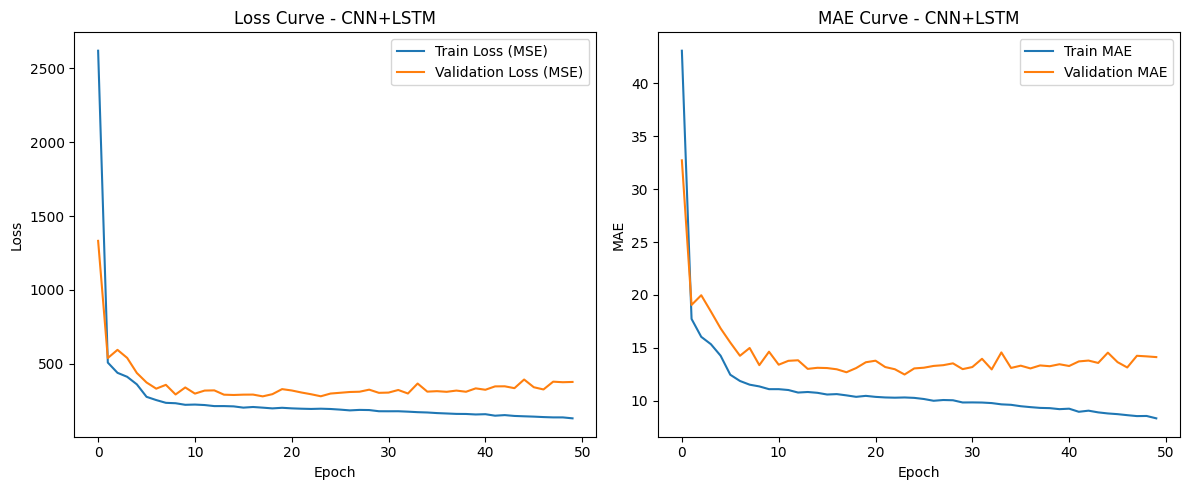

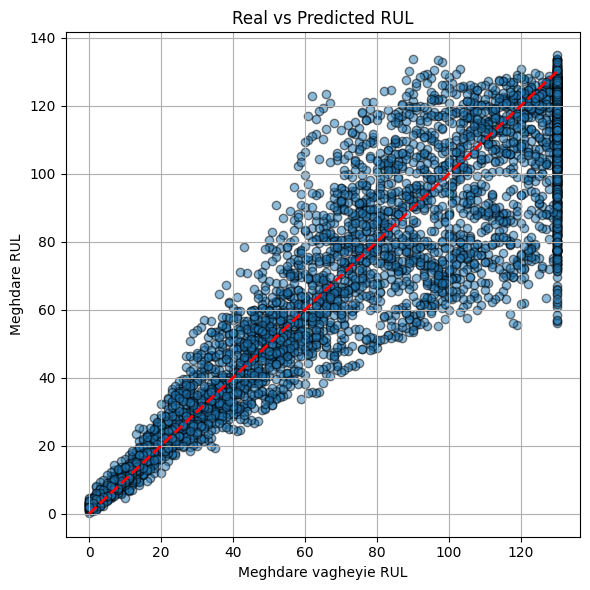

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# CNN + LSTM
input_shape = X_train_windows.shape[1:]

model_cnn_lstm = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    LSTM(100, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

model_cnn_lstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model_cnn_lstm.summary()

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

start_time = time.time()

history_cnn_lstm = model_cnn_lstm.fit(
    X_train_windows, y_train_windows,
    validation_data=(X_val_windows, y_val_windows),
    batch_size=32,
    epochs=50,
    callbacks=[],
    verbose=2
)
end_time = time.time()
print(f"Training time: {(end_time - start_time)/60:.2f} minutes")

eval_results = model_cnn_lstm.evaluate(X_test_windows, y_test_windows, verbose=0)
print(f"MSE: {eval_results[0]:.4f}")
print(f"MAE: {eval_results[1]:.4f}")

y_pred = model_cnn_lstm.predict(X_test_windows)
rmse = np.sqrt(mean_squared_error(y_test_windows, y_pred))
y_pred_safe2 = np.maximum(y_pred, 0)
y_test_safe1 = np.maximum(y_test_windows, 0)

log_rmse = np.sqrt(np.mean(np.square(np.log1p(y_test_safe1) - np.log1p(y_pred_safe2))))
r2 = r2_score(y_test_windows, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"log RMSE: {log_rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Nemudarha
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_cnn_lstm.history['loss'], label='Train Loss (MSE)')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss Curve - CNN+LSTM'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn_lstm.history['mae'], label='Train MAE')
plt.plot(history_cnn_lstm.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch'); plt.ylabel('MAE'); plt.title('MAE Curve - CNN+LSTM'); plt.legend()

plt.tight_layout()
plt.show()

# Nemudare vagheyi va pishbini shode
plt.figure(figsize=(6,6))
plt.scatter(y_test_windows, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test_windows.min(), y_test_windows.max()],
         [y_test_windows.min(), y_test_windows.max()],
         'r--', lw=2)
plt.xlabel("Meghdare vagheyie RUL")
plt.ylabel("Meghdare RUL")
plt.title("Real vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()

# plt.figure(figsize=(10,6))
# plt.plot(y_test_windows, label='Actual RUL', marker='o')
# plt.plot(y_pred, label='Predicted RUL', marker='x')
# plt.title('Nemudare vagheyi va pishbini shode RUL ruye dade Test')
# plt.xlabel('Sample Index')
# plt.ylabel('RUL')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
print("y_test_windows shape:", y_test_windows.shape)
print("y_pred shape:", y_pred.shape)


y_test_windows shape: (5349,)
y_pred shape: (5349, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# LSTM + CNN
input_shape = X_train_windows.shape[1:]

model_cnn_lstm = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    LSTM(100, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)  # خروجی RUL
])


model_cnn_lstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model_cnn_lstm.summary()

# Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

start_time = time.time()

history_cnn_lstm = model_cnn_lstm.fit(
    X_train_windows, y_train_windows,
    validation_data=(X_val_windows, y_val_windows),
    batch_size=32,
    epochs=50,
    callbacks=[],
    verbose=2
)
end_time = time.time()
print(f"Training time: {(end_time - start_time)/60:.2f} minutes")

eval_results = model_cnn_lstm.evaluate(X_test_windows, y_test_windows, verbose=0)
print(f"\nMSE: {eval_results[0]:.4f}")
print(f"MAE: {eval_results[1]:.4f}")

y_pred = model_cnn_lstm.predict(X_test_windows)
rmse = np.sqrt(mean_squared_error(y_test_windows, y_pred))
r2 = r2_score(y_test_windows, y_pred)
y_pred_safe2 = np.maximum(y_pred, 0)
y_test_safe1 = np.maximum(y_test_windows, 0)

log_rmse = np.sqrt(np.mean(np.square(np.log1p(y_test_safe1) - np.log1p(y_pred_safe2))))

print(f"log RMSE: {log_rmse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² (Coefficient of Determination): {r2:.4f}")

# Nemudarha
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_cnn_lstm.history['loss'], label='Train Loss (MSE)')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss Curve - CNN+LSTM'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn_lstm.history['mae'], label='Train MAE')
plt.plot(history_cnn_lstm.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch'); plt.ylabel('MAE'); plt.title('MAE Curve - CNN+LSTM'); plt.legend()

plt.tight_layout()
plt.show()


# Nemudare vagheyi dar barabare pishbini shode
plt.figure(figsize=(6,6))
plt.scatter(y_test_windows, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test_windows.min(), y_test_windows.max()],
         [y_test_windows.min(), y_test_windows.max()],
         'r--', lw=2)
plt.xlabel("Meghdare vagheyie RUL")
plt.ylabel("Meghdare RUL")
plt.title("Real vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 30, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30, 100)        │        44,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ (None, 100)            │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,059 (199.45 KB)

 Trainable params: 51,059 (199.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
309/309 - 4s - 13ms/step - loss: 2532.1130 - mae: 41.0396 - val_loss: 1047.2261 - val_mae: 27.4218
Epoch 2/50
309/309 - 2s - 8ms/step - loss: 802.1819 - mae: 22.7094 - val_loss: 859.6444 - val_mae: 24.7506
Epoch 3/50
309/309 - 2s - 8ms/step - loss: 590.4273 - mae: 18.8552 - val_loss: 638.7042 - val_mae: 20.2296
Epoch 4/50
309/309 - 2s - 7ms/step - loss: 463.3655 - mae: 16.6353 - val_loss: 563.6229 - val_mae: 18.8387
Epoch 5/50
309/309 - 2s - 6ms/step - loss: 422.9155 - mae: 15.8450 - val_loss: 483.4717 - val_mae: 18.0264
Epoch 6/50
309/309 - 3s - 8ms/step - loss: 366.1019 - mae: 14.6049 - val_loss: 402.4351 - val_mae: 16.0818
Epoch 7/50
309/309 - 3s - 9ms/step - loss: 335.2005 - mae: 13.9567 - val_loss: 375.6992 - val_mae: 15.4882
Epoch 8/50
309/309 - 3s - 8ms/step - loss: 305.8845 - mae: 13.2400 - val_loss: 375.5912 - val_mae: 15.1125
Epoch 9/50
309/309 - 2s - 6ms/step - loss: 298.1722 - mae: 13.0422 - val_loss: 361.8155 - val_mae: 14.6395
Epoch 10/50
309/309 - 2s - 7ms/ste

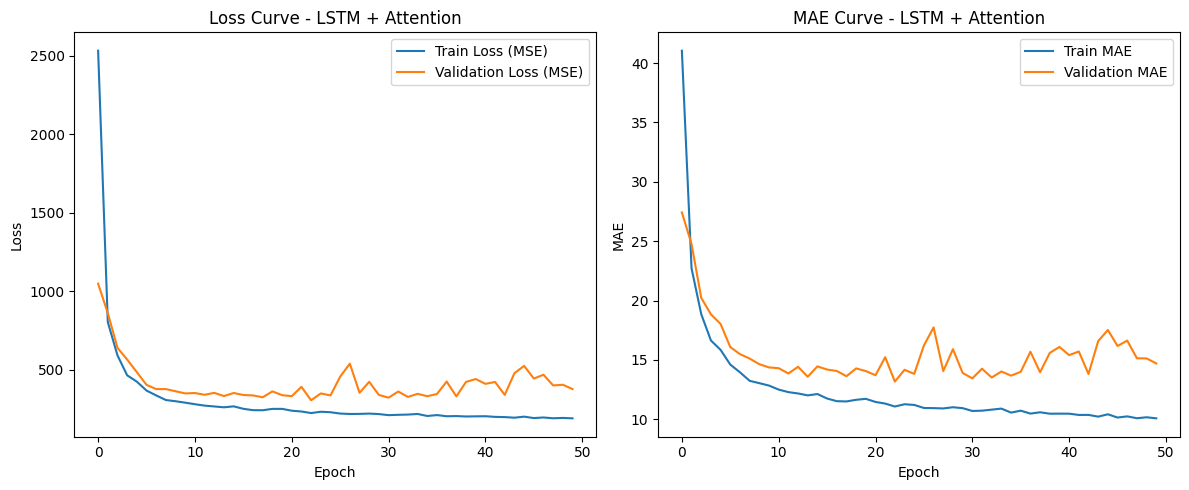

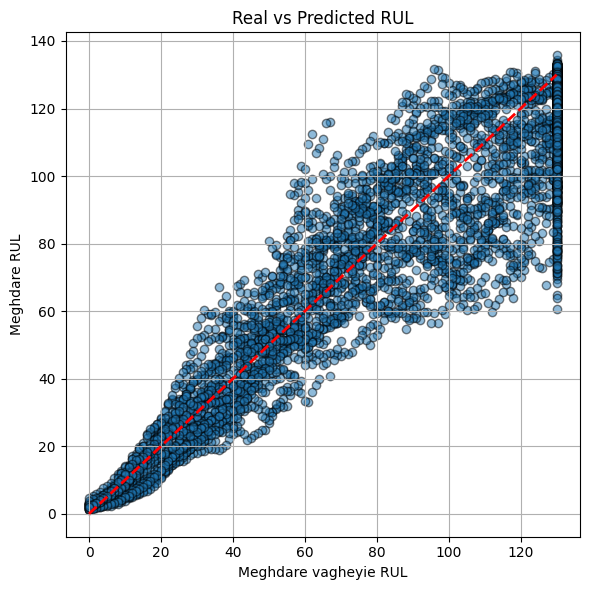

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Layer
from tensorflow.keras.layers import Permute, Multiply, Lambda, RepeatVector
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

# Laye Attention
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[1], 1),
                                 initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)  # Energy attention
        a = K.softmax(e, axis=1)               # normalsazie vaznha
        output = x * a                         # Vazndehi be khurujihaye LSTM
        return K.sum(output, axis=1)           # Tajmi'e vazndar

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

# LSTM + Attention
input_shape = X_train_windows.shape[1:]
inputs = Input(shape=input_shape)

x = LSTM(100, return_sequences=True)(inputs)  # Khurujie gamhaye zamani
x = Attention()(x)                            # Laye attention ruye khurujihaye zamani
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1)(x)

model_lstm_attention = Model(inputs, outputs)

model_lstm_attention.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model_lstm_attention.summary()

# # callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

start_time = time.time()

history_lstm_attention = model_lstm_attention.fit(
    X_train_windows, y_train_windows,
    validation_data=(X_val_windows, y_val_windows),
    batch_size=32,
    epochs=50,
    callbacks=[],
    verbose=2
)
end_time = time.time()
print(f"\nTraining time: {(end_time - start_time)/60:.2f} minutes")

eval_results = model_lstm_attention.evaluate(X_test_windows, y_test_windows, verbose=0)
print(f"MSE: {eval_results[0]:.4f}")
print(f"MAE: {eval_results[1]:.4f}")

y_pred = model_lstm_attention.predict(X_test_windows)
y_pred = y_pred.squeeze()

r2 = r2_score(y_test_windows, y_pred)


y_pred_safe2 = np.maximum(y_pred, 0)
y_test_safe1 = np.maximum(y_test_windows, 0)

log_rmse = np.sqrt(np.mean(np.square(np.log1p(y_test_safe1) - np.log1p(y_pred_safe2))))

rmse = np.sqrt(mean_squared_error(y_test_windows, y_pred))

print(f"RMSE: {rmse:.4f}")
print(f"log RMSE: {log_rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Nemudarha
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_lstm_attention.history['loss'], label='Train Loss (MSE)')
plt.plot(history_lstm_attention.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve - LSTM + Attention')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_lstm_attention.history['mae'], label='Train MAE')
plt.plot(history_lstm_attention.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE Curve - LSTM + Attention')
plt.legend()

plt.tight_layout()
plt.show()

# Nemudare vagheyi va pishbini shode
plt.figure(figsize=(6,6))
plt.scatter(y_test_windows, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test_windows.min(), y_test_windows.max()],
         [y_test_windows.min(), y_test_windows.max()],
         'r--', lw=2)
plt.xlabel("Meghdare vagheyie RUL")
plt.ylabel("Meghdare RUL")
plt.title("Real vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()

# plt.figure(figsize=(10,6))
# plt.plot(y_test_windows, label='Actual RUL', marker='o')
# plt.plot(y_pred, label='Predicted RUL', marker='x')
# plt.title('Nemudare vagheyi va pishbini shodeye RUL ruye dade Test')
# plt.xlabel('Sample Index')
# plt.ylabel('RUL')
# plt.legend()
# plt.grid(True)
# plt.show()